In [1]:

#importing the necessary modules
from keras.datasets import mnist
import numpy as np
     

In [2]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Training data:


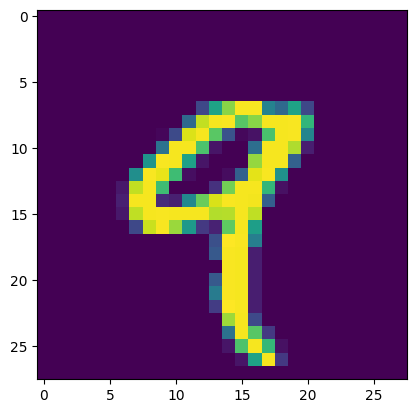

Label of this image is 9


In [3]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [4]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [6]:
#normalising
xtrain=xtrain/255
xtest=xtest/255
     

In [7]:
#implementing one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [8]:
#importing the model
from keras.models import Sequential

In [9]:

#creating model object
model=Sequential()

In [10]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [11]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

C:\Users\Srivalli\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:

#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 126s 204ms/step - accuracy: 0.6442 - loss: 1.0507 - val_accuracy: 0.9482 - val_loss: 0.1656
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 138s 229ms/step - accuracy: 0.9500 - loss: 0.1613 - val_accuracy: 0.9727 - val_loss: 0.0843
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 132s 219ms/step - accuracy: 0.9696 - loss: 0.0972 - val_accuracy: 0.9791 - val_loss: 0.0658
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 129s 197ms/step - accuracy: 0.9779 - loss: 0.0701 - val_accuracy: 0.9793 - val_loss: 0.0626
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 103s 171ms/step - accuracy: 0.9812 - loss: 0.0593 - val_accuracy: 0.9841 - val_loss: 0.0459


In [14]:

#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)
     

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9963 - loss: 0.0111
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9907 - loss: 0.0281


([0.010450577363371849, 0.9963499903678894],
 [0.025198377668857574, 0.9919999837875366])